In [1]:
import gevent
import numpy as np
import matplotlib.pyplot as plt
from models import get_dist_rnd, generate_data
from models.NpGlm import NpGlm



In [2]:
def mean_absolute_error_vs_training_samples():
    np.random.seed(0)
    d = 10
    num_trains = range(100, 1001, 100)
    dist = 'ray'
    dist_rnd = get_dist_rnd(dist)
    repeats = 10
    # censoring = .5
    results = np.zeros((repeats, len(num_trains)))

    for censoring in [.1, .2, .4]:
        print('CR = %d%%' % (censoring*100))

        def test_case(tc):
            # print('Test #%d:' % tc)
            w = np.random.randn(d + 1, 1)

            i = 0
            for n in num_trains:
                # print(n)
                X, T = generate_data(w, n, dist_rnd)
                Y = np.array([True for _ in range(n)])

                idx = int(n * (1 - censoring))
                Y[idx + 1:] = False
                T[idx + 1:] = T[idx]

                npglm = NpGlm()
                npglm.fit(X, Y, T)
                mae = npglm.get_error(w, dist)
                results[tc, i] = mae
                i += 1

            print('Test %d done' % tc)

        threads = [gevent.spawn(test_case, tc) for tc in range(repeats)]
        gevent.joinall(threads)
        mean = np.mean(results, axis=0)
        plt.plot(num_trains, mean, label='CR = %d%%\n' % (censoring*100))
    plt.title(mean_absolute_error_vs_training_samples.__name__)
    plt.legend(loc='upper right')
    plt.show()

In [3]:
def mean_absolute_error_vs_censored_samples():
    np.random.seed(0)
    d = 10
    num_censored = range(0, 201, 20)
    dist = 'ray'
    dist_rnd = get_dist_rnd(dist)
    repeats = 10
    results = np.zeros((repeats, len(num_censored)))

    for num_observed in [200, 300, 400]:
        print('#Observed = %d' % num_observed)

        def test_case(tc):
            # print('Test #%d:' % tc)
            w = np.random.randn(d + 1, 1)
            n = num_observed + max(num_censored)
            X, T = generate_data(w, n, dist_rnd)
            Y = np.array([False for _ in range(n)])
            Y[:num_observed] = True

            i = 0
            for k in num_censored:

                Xtrain = X[:num_observed+k, :]
                Ytrain = Y[:num_observed+k]
                Ttrain = T[:num_observed+k]
                if k > 0:
                    Ttrain[num_observed:] = Ttrain[num_observed]

                npglm = NpGlm()
                npglm.fit(Xtrain, Ytrain, Ttrain)
                mae = npglm.get_error(w, dist)
                results[tc, i] = mae
                i += 1

            print('Test %d done' % tc)

        threads = [gevent.spawn(test_case, tc) for tc in range(repeats)]
        gevent.joinall(threads)
        mean = np.mean(results, axis=0)
        plt.plot(num_censored, mean, label='#Obs=%d\n' % num_observed)
    plt.title(mean_absolute_error_vs_censored_samples.__name__)
    plt.legend(loc='upper right')
    plt.show()



CR = 10%
Test 0 done
Test 1 done
Test 2 done
Test 3 done
Test 4 done
Test 5 done
Test 6 done
Test 7 done
Test 8 done
Test 9 done
CR = 20%
Test 0 done
Test 1 done
Test 2 done
Test 3 done
Test 4 done
Test 5 done
Test 6 done
Test 7 done
Test 8 done
Test 9 done
CR = 40%
Test 0 done
Test 1 done
Test 2 done
Test 3 done
Test 4 done
Test 5 done
Test 6 done
Test 7 done
Test 8 done
Test 9 done


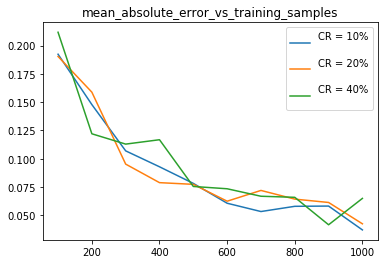

#Observed = 200
Test 0 done
Test 1 done
Test 2 done
Test 3 done
Test 4 done
Test 5 done
Test 6 done
Test 7 done
Test 8 done
Test 9 done
#Observed = 300
Test 0 done
Test 1 done
Test 2 done
Test 3 done
Test 4 done
Test 5 done
Test 6 done
Test 7 done
Test 8 done
Test 9 done
#Observed = 400
Test 0 done
Test 1 done
Test 2 done
Test 3 done
Test 4 done
Test 5 done
Test 6 done
Test 7 done
Test 8 done
Test 9 done


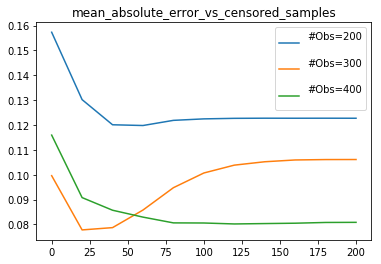

In [15]:
def main():
    mean_absolute_error_vs_training_samples()
    mean_absolute_error_vs_censored_samples()

if __name__ == '__main__':
    main()

